In [132]:
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import colorlover as cl

In [195]:
colors = ['#%02x%02x%02x' % tuple([int(element) for element in color ])
          for color in cl.to_numeric(cl.scales['10']['div']['RdYlBu'])]

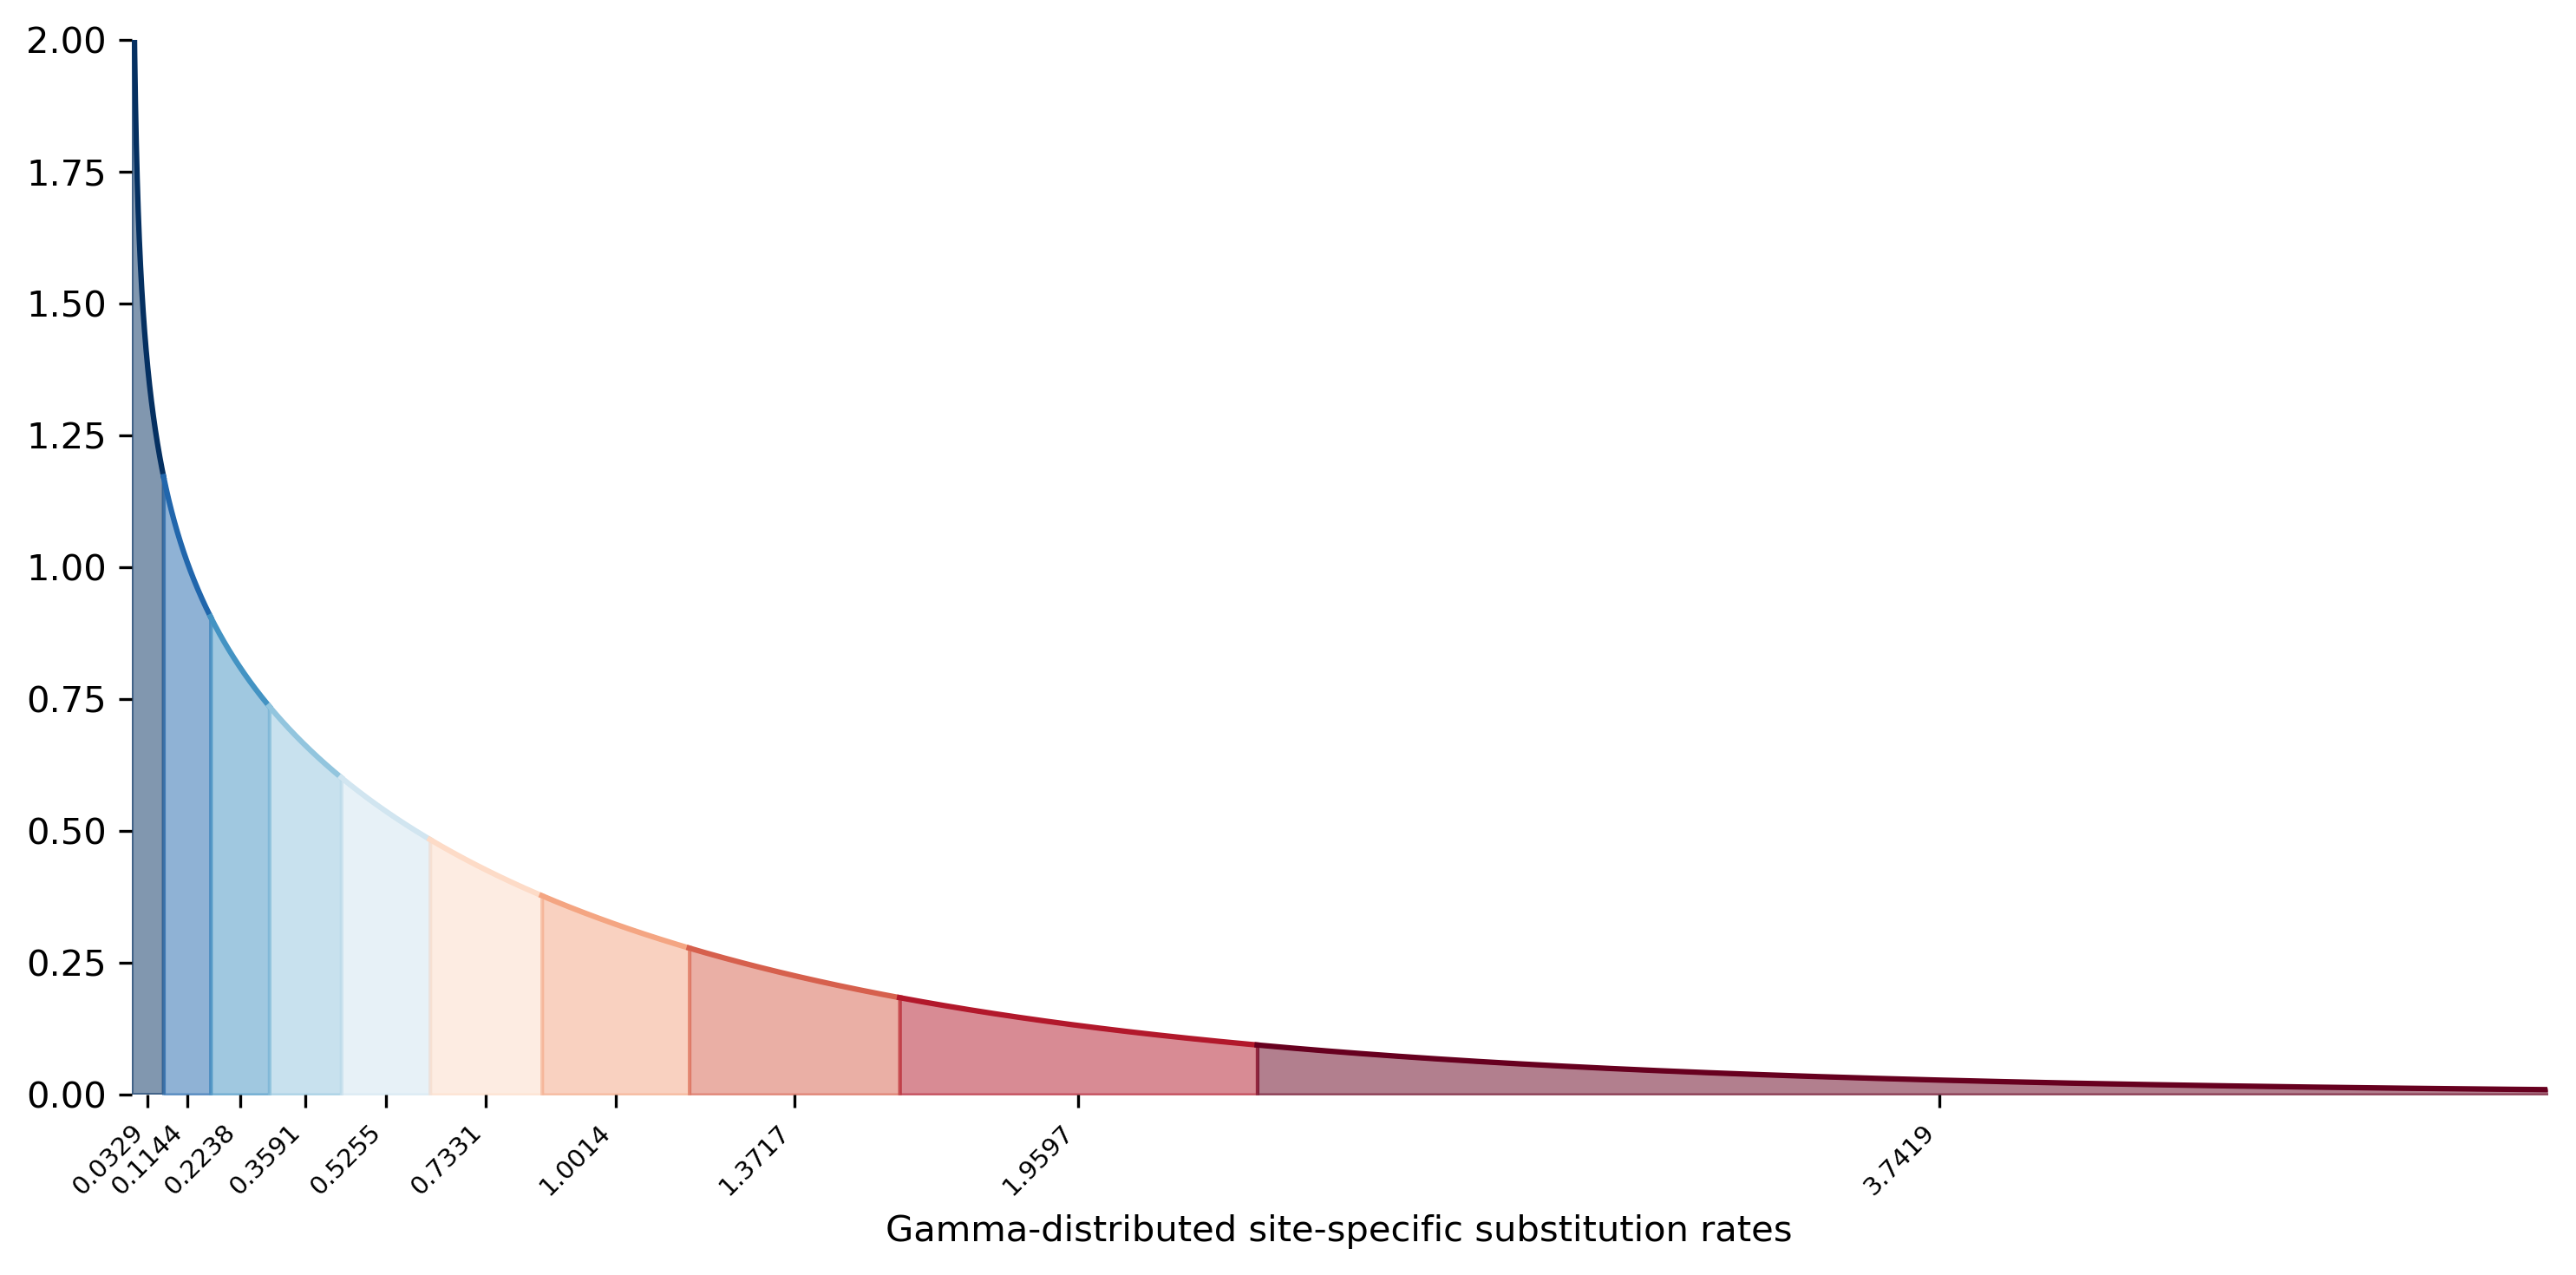

In [352]:
colors = ['#%02x%02x%02x' % tuple([int(element) for element in color ])
          for color in cl.to_numeric(cl.scales['10']['div']['RdBu'][::-1])]

alpha = 0.8025
beta  = 1/alpha
initial_position = 0
fig, ax = plt.subplots(figsize=(10,5), dpi=300)
x = np.linspace(0, 5, 1000)
y = stats.gamma.pdf(x, a=alpha, scale=beta)
#ax.plot(x,y, color='k')
x_ticks = []
for x_tmp, color in zip(np.linspace(0,0.99, 11)[1:], colors):
    final_position = stats.gamma.ppf(x_tmp, a=alpha, scale=beta)
    x = np.linspace(initial_position, final_position, 1000)
    y = stats.gamma.pdf(x, a=alpha, scale=beta)
    ax.plot(x,y,color=color)
    ax.fill_between(x,y, 0,color=color, alpha=0.5)
    
    x_ticks.append(np.median(x))
    initial_position = final_position

ax.set_xlabel('Gamma-distributed site-specific substitution rates')
ax.set_ylim(bottom=0, top=2)
ax.set_xlim(left=0, right=5)
ax.set_frame_on(False)
ax.set_xticks(x_ticks)
ax.set_xticklabels([round(tmp, 4) for tmp in x_ticks],
                   rotation=45,
                   fontdict={'fontsize':7,
                             'horizontalalignment':'right'})
fig.tight_layout()
fig.savefig('/Users/thiberio/Desktop/gamma_discretized_10.pdf', dpi=600, transparent=True)

In [348]:
ax.set_xticklabels?